In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import SeparableConv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


In [3]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/archive.zip"

In [4]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/train" # Directory containing the training data
test_dir = "/content/test"  # Directory containing the validation data

In [6]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )
train_dataset  = train_datagen.flow_from_directory(directory = '/content/train',
                                                   target_size = (64, 64),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 256)

valid_dataset = valid_datagen.flow_from_directory(directory = '/content/train',
                                                  target_size = (64, 64),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 256)
test_dataset = test_datagen.flow_from_directory(directory = '/content/test',
                                                  target_size = (64, 64),
                                                  class_mode = 'categorical',
                                                  batch_size = 256)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [16]:
inputs = Input((64,64,3))

h = Conv2D(32, (3,3))(inputs)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = Conv2D(64, (3,3))(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)

b = Conv2D(128, (1,1), strides = (2,2))(h)
b = BatchNormalization()(b)

h = SeparableConv2D(128, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(128, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = MaxPooling2D((2,2))(h)

h = concatenate([h, b], name='first')

b = Conv2D(128, (1,1), strides = (2,2))(h)
b = BatchNormalization()(b)



h = SeparableConv2D(128, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(128, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = MaxPooling2D((2,2), strides=(2,2))(h)

h = concatenate([h, b], name='second')


b = Conv2D(128, (1,1), padding='same')(h)
b = BatchNormalization()(b)
b = MaxPooling2D((2,2), strides=(2,2))(b)

h = SeparableConv2D(256, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(256, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = MaxPooling2D((2,2), strides=(2,2))(h)


h = concatenate([h, b], name='third')
b = h


h = tf.nn.relu(h)
h = SeparableConv2D(512, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(512, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(512, (3,3), padding='same')(h)
h = BatchNormalization()(h)

h = concatenate([h, b], name='fourth')
b = h


h = tf.nn.relu(h)
h = SeparableConv2D(512, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(256, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(256, (3,3), padding='same')(h)
h = BatchNormalization()(h)


h = concatenate([h, b], name='fifth')
b = h


b = Conv2D(256, (1,1), strides = (1,1))(h)
b = BatchNormalization()(b)

h = tf.nn.relu(h)
h = SeparableConv2D(512, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(512, (3,3), padding='same')(h)
h = BatchNormalization()(h)

h = concatenate([h, b], name='sixth')

h = SeparableConv2D(256, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)

h = SeparableConv2D(256, (3,3), padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)

h = GlobalAveragePooling2D()(h)

h = Dense(128, activation='relu')(h)
h = Dropout(0.4)(h)
h = Dense(64, activation='relu')(h)
h = Dropout(0.3)(h)
h = Dense(7, activation='softmax')(h)

outputs = h

model = Model(inputs, outputs)
model.summary()
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 62, 62, 32)   896         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_44 (BatchN  (None, 62, 62, 32)  128         ['conv2d_12[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 tf.nn.relu_30 (TFOpLambda)     (None, 62, 62, 32)   0           ['batch_normalization_44[0]

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

EPOCHS = 5
BATCH_SIZE = 256

# Number of samples in your training and validation sets
train_num = train_dataset.samples
valid_num = valid_dataset.samples

# Fit the model
history = model.fit(
    train_dataset,
    epochs=5,
    steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_dataset,
    validation_steps=valid_num // BATCH_SIZE,
    verbose=1
)

Epoch 1/5
89/89 [==============================] - 147s 768ms/step - loss: 1.8198 - accuracy: 0.2383 - val_loss: 1.9105 - val_accuracy: 0.2491
Epoch 2/5
89/89 [==============================] - 60s 668ms/step - loss: 1.7102 - accuracy: 0.3061 - val_loss: 1.8819 - val_accuracy: 0.1722
Epoch 3/5
89/89 [==============================] - 63s 708ms/step - loss: 1.5766 - accuracy: 0.3794 - val_loss: 1.8701 - val_accuracy: 0.1690
Epoch 4/5
89/89 [==============================] - 60s 673ms/step - loss: 1.4749 - accuracy: 0.4306 - val_loss: 1.8979 - val_accuracy: 0.1676
Epoch 5/5
89/89 [==============================] - 61s 686ms/step - loss: 1.4066 - accuracy: 0.4632 - val_loss: 1.8979 - val_accuracy: 0.1866


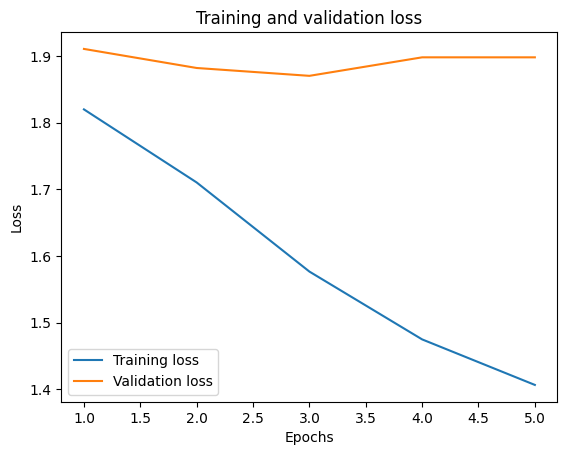

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



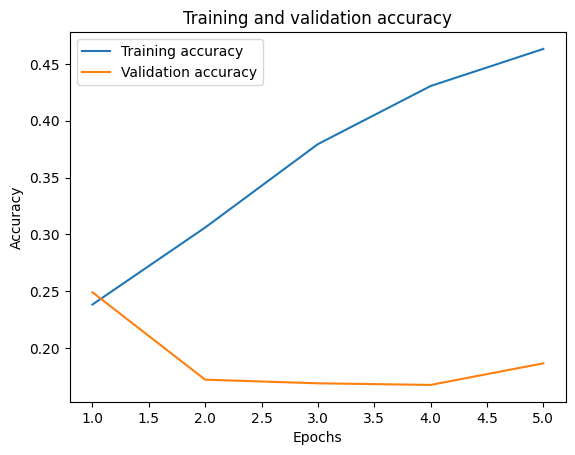

In [19]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()